In [1]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 8.5 MB/s 
     |████████████████████████████████| 1.8 MB 41.0 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=45b2797315950be19c4176775795e40e5e18dc2e2861c4908fd419fa510d1edc
  Stored in directory: /root/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built theano-pymc


In [2]:
import scipy.stats as sta
import numpy as np 
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.optimize import fmin

Historia:
Pewien sprzedawca na Allegro, zajmujący się sprzedażą głównie tanich drobiazgów z Chin, zorientował się iż może wykorzystać swój sklep do prania pieniędzy. Nie był jednak głupi, nie chciał zrobić tego w sposób oczywisty. Postanowił więc zrobić ten przekręt wtedy, gdy na przełomie listopada i grudnia w kontekście zbliżających się świąt zwiększa się popyt na towar, który sprzedaje i wtedy właśnie dokonać przestępstwa.

Dane:
X, X_corr = liczba porządkowa odpowiadająca dniom 1 listopada - 30 grudnia
Y = ilość sztuk sprzedanego towaru w danym dniu
Y_corr = ilość pieniędzy ze sprzedanego towaru w danym dniu

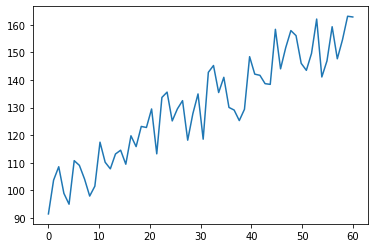

In [13]:
def generate_data():
  X = np.linspace(0, 60, num=60)
  Y = np.linspace(100, 160, num=60)

  for index in range(len(X)):
    Y[index] *= np.random.uniform(0.9, 1.1)
  return X, Y

X, Y = generate_data()

plt.plot(X, Y)
plt.show()

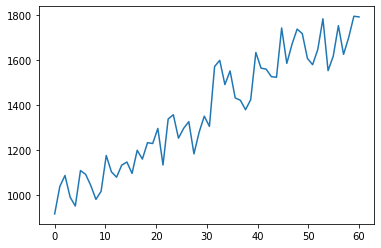

In [16]:
def generate_correlated_data(X, Y):
  X_corr = np.copy(X)
  Y_corr = np.empty_like(X_corr)

  for index in range(len(X_corr)):
    if index < 30:
      Y_corr[index] = Y[index] * 10
    else:
      Y_corr[index] = Y[index] * 11

  return X_corr, Y_corr

X_corr, Y_corr = generate_correlated_data(X, Y)

plt.plot(X_corr, Y_corr)
plt.show()

Zmiana współczynnika korelacji X_corr z Y_corr = 10 -> 11


Początek przekrętu - 30 dzień

In [17]:
with pm.Model() as model:
  b_1 = pm.Uniform("b_1", lower=0, upper=15)
  b_2 = pm.Uniform("b_2", lower=0, upper=15)
  tau = pm.DiscreteUniform('tau', lower=0, upper=len(Y)-1)
  idx = np.arange(len(Y))
  b = pm.math.switch (tau > idx , b_1 , b_2)
  m_e = pm.Deterministic('m_e', b * Y)
  sigma_e = pm.Uniform('sigma_e', lower=0.1, upper=100)
  emission = pm.Normal('emission', mu=m_e, sigma=sigma_e, observed=Y_corr)
  idata = pm.sample(2000, tune=2500, return_inferencedata=True)

/usr/local/lib/python3.7/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


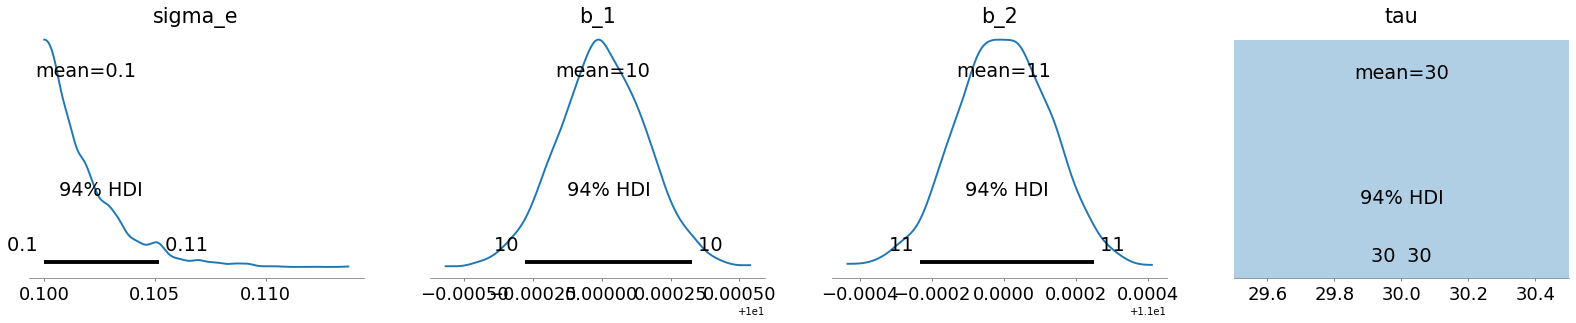

In [18]:
with model:
    az.plot_posterior(idata,
                      var_names=['sigma_e', 'b_1', 'b_2', 'tau'],
                      textsize=18,
                      point_estimate='mean',
                      rope_color='black')

Przestępstwo zostało wykryte z powodzeniem w dniu 30 z prawidłowym współczynnikiem nachylenia prostej = 11 zamiast 10

--------------------------------------------------------------------------------

2 A)

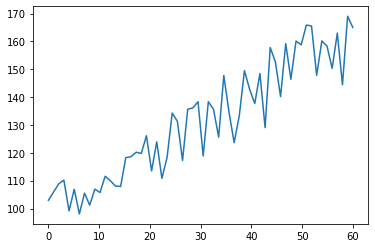

In [19]:
def generate_data():
  X = np.linspace(0, 60, num=60)
  Y = np.linspace(100, 160, num=60)

  for index in range(len(X)):
    Y[index] *= np.random.uniform(0.9, 1.1)
  return X, Y

X, Y = generate_data()

plt.plot(X, Y)
plt.show()

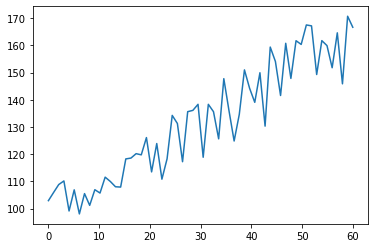

In [20]:
def generate_correlated_data(X, Y):
  X_corr = np.copy(X)
  Y_corr = np.empty_like(X_corr)

  for index in range(len(X_corr)):
    if index < 35:
      Y_corr[index] = Y[index] * 1
    else:
      Y_corr[index] = Y[index] * 1.01

  return X_corr, Y_corr

X_corr, Y_corr = generate_correlated_data(X, Y)

plt.plot(X_corr, Y_corr)
plt.show()

In [21]:
with pm.Model() as model:
  b_1 = pm.Uniform("b_1", lower=0, upper=15)
  b_2 = pm.Uniform("b_2", lower=0, upper=15)
  tau = pm.DiscreteUniform('tau', lower=0, upper=len(Y)-1)
  idx = np.arange(len(Y))
  b = pm.math.switch (tau > idx , b_1 , b_2)
  m_e = pm.Deterministic('m_e', b * Y)
  sigma_e = pm.Uniform('sigma_e', lower=0.1, upper=100)
  emission = pm.Normal('emission', mu=m_e, sigma=sigma_e, observed=Y_corr)
  idata = pm.sample(2000, tune=2500, return_inferencedata=True)

/usr/local/lib/python3.7/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


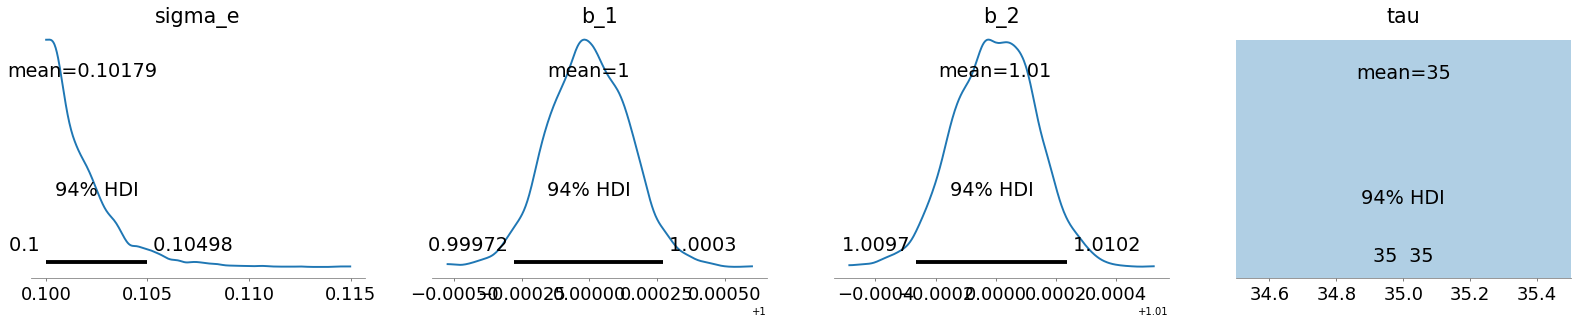

In [22]:
with model:
    az.plot_posterior(idata, round_to=5,
                      var_names=['sigma_e', 'b_1', 'b_2', 'tau'],
                      textsize=18,
                      point_estimate='mean',
                      rope_color='black')

Po zmniejszeniu różnicy 1 -> 1.01 model nadal prawidłowo odczytuje dzień rozpoczęcia przekrętu

2 B)

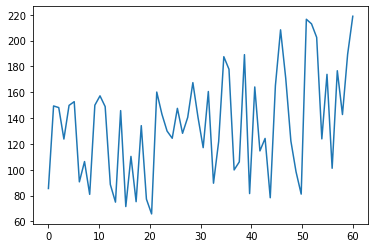

In [23]:
def generate_data():
  X = np.linspace(0, 60, num=60)
  Y = np.linspace(100, 160, num=60)

  for index in range(len(X)):
    Y[index] *= np.random.uniform(0.5, 1.5)
  return X, Y

X, Y = generate_data()

plt.plot(X, Y)
plt.show()

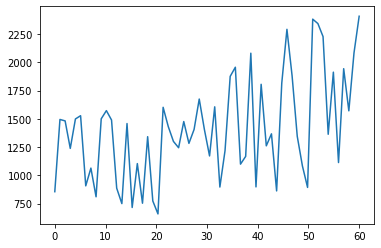

In [25]:
def generate_correlated_data(X, Y):
  X_corr = np.copy(X)
  Y_corr = np.empty_like(X_corr)

  for index in range(len(X_corr)):
    if index < 35:
      Y_corr[index] = Y[index] * 10
    else:
      Y_corr[index] = Y[index] * 11

  return X_corr, Y_corr

X_corr, Y_corr = generate_correlated_data(X, Y)

plt.plot(X_corr, Y_corr)
plt.show()

In [26]:
with pm.Model() as model:
  b_1 = pm.Uniform("b_1", lower=0, upper=15)
  b_2 = pm.Uniform("b_2", lower=0, upper=15)
  tau = pm.DiscreteUniform('tau', lower=0, upper=len(Y)-1)
  idx = np.arange(len(Y))
  b = pm.math.switch (tau > idx , b_1 , b_2)
  m_e = pm.Deterministic('m_e', b * Y)
  sigma_e = pm.Uniform('sigma_e', lower=0.1, upper=100)
  emission = pm.Normal('emission', mu=m_e, sigma=sigma_e, observed=Y_corr)
  idata = pm.sample(2000, tune=2500, return_inferencedata=True)

/usr/local/lib/python3.7/dist-packages/arviz/stats/diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


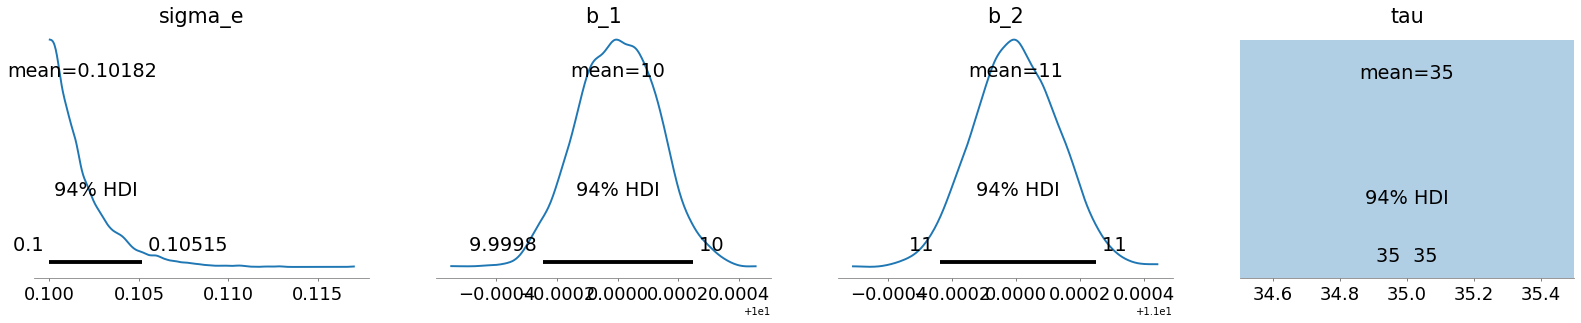

In [27]:
with model:
    az.plot_posterior(idata, round_to=5,
                      var_names=['sigma_e', 'b_1', 'b_2', 'tau'],
                      textsize=18,
                      point_estimate='mean',
                      rope_color='black')

Po znacznym zwiększeniu szumu w danych (początkowy zakres szumu 0.8 - 1.2, tutejszy 0.5 - 1.5) model nadal prawidłowo odczytuje dzień rozpoczęcia przekrętu.

2 C)

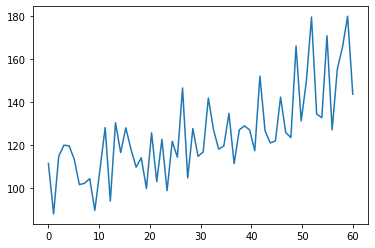

In [29]:
def generate_data():
  X = np.linspace(0, 60, num=60)
  Y = np.linspace(100, 160, num=60)

  for index in range(len(X)):
    Y[index] *= np.random.uniform(0.8, 1.2)
  return X, Y

X, Y = generate_data()

plt.plot(X, Y)
plt.show()

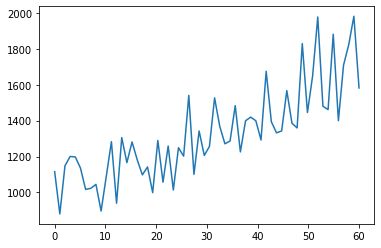

In [30]:
def generate_correlated_data(X, Y):
  X_corr = np.copy(X)
  Y_corr = np.empty_like(X_corr)

  for index in range(len(X_corr)):
    if index < 20:
      Y_corr[index] = Y[index] * 10
    elif 20 <= index < 25:
      Y_corr[index] = Y[index] * 10.25
    elif 25 <= index < 30:
      Y_corr[index] = Y[index] * 10.5
    elif 30 <= index < 35:
      Y_corr[index] = Y[index] * 10.75
    else:
      Y_corr[index] = Y[index] * 11

  return X_corr, Y_corr

X_corr, Y_corr = generate_correlated_data(X, Y)

plt.plot(X_corr, Y_corr)
plt.show()

In [31]:
with pm.Model() as model:
  b_1 = pm.Uniform("b_1", lower=0, upper=15)
  b_2 = pm.Uniform("b_2", lower=0, upper=15)
  tau = pm.DiscreteUniform('tau', lower=0, upper=len(Y)-1)
  idx = np.arange(len(Y))
  b = pm.math.switch (tau > idx , b_1 , b_2)
  m_e = pm.Deterministic('m_e', b * Y)
  sigma_e = pm.Uniform('sigma_e', lower=0.1, upper=100)
  emission = pm.Normal('emission', mu=m_e, sigma=sigma_e, observed=Y_corr)
  idata = pm.sample(2000, tune=2500, return_inferencedata=True)

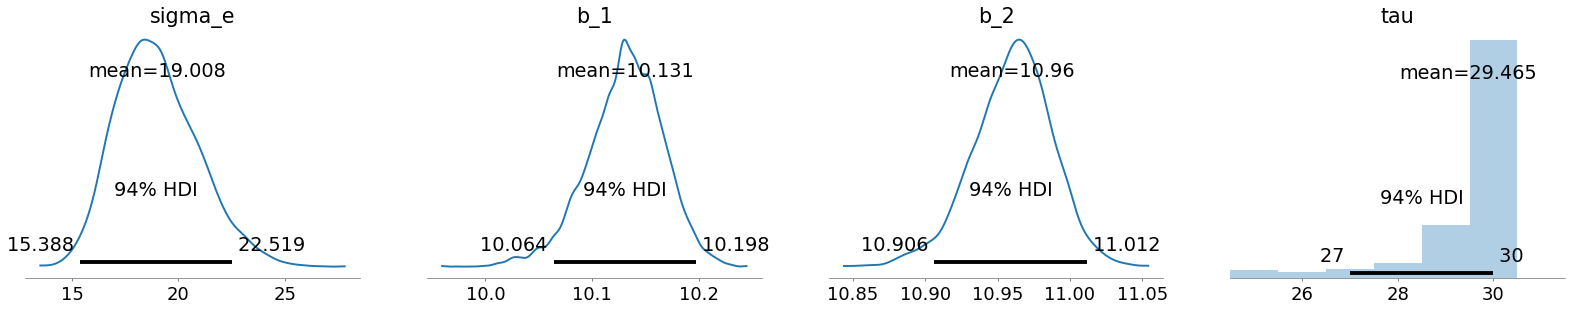

In [32]:
with model:
    az.plot_posterior(idata, round_to=5,
                      var_names=['sigma_e', 'b_1', 'b_2', 'tau'],
                      textsize=18,
                      point_estimate='mean',
                      rope_color='black')

Po dodaniu bardziej gładko rosnącej krzywej dla wartości Y model nadal prawidłowo odczytuje dzień rozpoczęcia przekrętu, choć z zmniejszą dokładnością po przecinku oraz wyznacza wartości współczynników nachylenia prostej jako bardziej uśrednione wartości